# OneMax optimization

* Binary String Based Optimization Problem

* Binary String of $0$ and $1$.

* Evaluate a binary string based on the number of $1$'s in the string

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [48]:
population_size = 1000
chromosome_size = 30
n_offsprings = 1
expected_output = 30
length = 20
mutation_rate = 0.01

### Initialize the population

In [49]:
P = np.array([np.random.randint(0, 2, size=chromosome_size) for _ in range(population_size)])

In [50]:
P

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 1, 1],
       [0, 1, 1, ..., 0, 0, 1]])

In [51]:
P.shape

(1000, 30)

* The array is the `population`.
* Each row in population is a `chromosome`.
* Each value in `phenotype/cell` is called `genes`/`genotype`.
* `phenotype` is how to expression the genotype i.e. the expression.

### Initialize the fitness function

#### How to define the fitness function ?

Let's say the fitness function is to maximize the count of `1`'s in chromosomes. More the count of `1`, the better the fitness of that individual. The stopping condition will be if the count is `10` i.e. all the genes are `1`'s.

We must have an expected output to work in case of genetic algorithm.

Let's say the expected output is `50`.

In [34]:
def fitness_func(P):
    count_value = []
    for i in range(population_size):
        count_value.append(P[i].sum())
    return np.array(count_value)

### Selection

There are many techniques of Parent Selection-

1. **Steady-State Selection:**

    In every generation few are selected (good - with high fitness) chromosomes for creating a new offspring. Then some (bad - with low fitness) chromosomes are removed and the new offspring is placed in their place. The rest of population survives to new generation.

    But the thing is, removing chromosomes is like removing `varieties/diversity` from the population. 

2. **Rank Selection:**

    Rank Selection also works with negative fitness values and is mostly used when the individuals in the population have very close fitness values (this happens usually at the end of the run). This leads to each individual having an almost equal share of the pie (like in case of fitness proportionate selection) and hence each individual no matter how fit relative to each other has an approximately same probability of getting selected as a parent. This in turn leads to a loss in the selection pressure towards fitter individuals, causing the GA to make poor parent selections in such situations.

3. **Roulette Wheel Selection:**

In the roulette wheel selection, the probability of choosing an individual for breeding of the next generation is proportional to its fitness, the better the fitness is, the higher chance for that individual to be chosen. Choosing individuals can be depicted as spinning a roulette that has as many pockets as there are individuals in the current generation, with sizes depending on their probability. Probability of choosing individual $i$ is equal to 
${\Sigma_{j=1}^{N}f_{j}}p_i = \frac{f_i}{\Sigma_{j=1}^{N} f_j}$, where $f_{i}$ is the fitness of $i$ and $N$ is the size of current generation (note that in this method one individual can be drawn multiple times).

4. **Tournament Selection:**

    Tournament selection involves running several "tournaments" among a few individuals (or "chromosomes") chosen at random from the population. The winner of each tournament (the one with the best fitness) is selected for crossover. `Selection pressure`, a probabilistic measure of a chromosome's likelihood of participation in the tournament based on the participant selection pool size, is easily adjusted by changing the tournament size, the reason is that if the tournament size is larger, weak individuals have a smaller chance to be selected, because, if a weak individual is selected to be in a tournament, there is a higher probability that a stronger individual is also in that tournament.

    Pseudo-Code:

    * choose k (the tournament size) individuals from the population at random
    * choose the best individual from the tournament with probability p
    * choose the second best individual with probability p*(1-p)
    * choose the third best individual with probability p*((1-p)^2)
        and so on

5. **Stochastic Universal Sampling:**

    https://en.wikipedia.org/wiki/Stochastic_universal_sampling

6. **Random Selection:**

    Picks the parent randomly with equal probability.

In [12]:
fitness_score = fitness_func(P)

In [13]:
fitness_score

array([ 5, 14,  8, 14,  4,  8, 10,  6, 14, 10,  9,  9, 13,  9, 10,  9, 11,
        8,  9,  7, 10, 15, 11,  8, 12, 13,  6, 11, 10, 14, 14, 11,  8, 11,
       10,  8,  8, 11, 10,  9,  8, 11,  8,  8,  9,  7, 10, 13, 10,  8, 10,
       12, 10, 14, 15, 17,  6,  9,  7,  9, 11,  7,  8,  9, 11,  9, 10, 11,
       10, 10, 10,  9, 10, 11, 13, 10,  8,  9,  9,  5, 12, 10,  6,  9, 10,
        8, 10, 12,  7, 11, 12,  7, 12,  7,  7, 10,  9, 11, 13,  9,  8, 11,
       11, 12, 10,  7,  9,  8, 12,  6, 10, 11, 13, 10, 14, 13,  9, 10,  6,
       14, 12,  6, 11, 13, 11,  9, 11, 14,  9, 11, 14,  8, 10, 11, 14, 12,
        7, 15, 11, 10, 12, 12, 10, 13,  7, 11, 10, 10, 11, 10,  6,  8, 10,
       11, 11,  7, 10,  9,  9, 10,  9,  9,  8, 12,  8, 10, 13,  6, 13,  7,
       12, 12, 11,  7,  9, 10, 11,  9, 12, 10,  6,  8, 10, 13,  9, 13,  9,
        7,  8, 10, 10, 10,  8, 12, 11, 10, 10,  7,  9, 12,  9, 10,  8,  9,
        6, 12,  6, 11,  8,  9, 12, 12, 12,  9,  8,  9,  8,  8, 11, 10, 14,
       11, 12,  7,  7, 13

### Using Roulette Wheel Parent Selection Technique

In [ ]:
fitness_score = fitness_score / np.sum(fitness_score)

In [ ]:
fitness_score

array([0.00107961, 0.0008397 , 0.00095965, 0.00107961, 0.00115958,
       0.00115958, 0.00095965, 0.0011196 , 0.00119957, 0.00079971,
       0.00115958, 0.0011196 , 0.00087968, 0.00095965, 0.00091967,
       0.00123955, 0.00099964, 0.00115958, 0.00107961, 0.00087968,
       0.00099964, 0.00107961, 0.00103963, 0.00115958, 0.00095965,
       0.00107961, 0.00075973, 0.00099964, 0.00115958, 0.00099964,
       0.00087968, 0.00115958, 0.00115958, 0.00087968, 0.00103963,
       0.00087968, 0.00103963, 0.00095965, 0.00091967, 0.00119957,
       0.00095965, 0.00107961, 0.00071974, 0.00095965, 0.00123955,
       0.00091967, 0.00099964, 0.00107961, 0.00107961, 0.00115958,
       0.00127954, 0.00095965, 0.00119957, 0.00099964, 0.00115958,
       0.00091967, 0.00107961, 0.00087968, 0.00067976, 0.00087968,
       0.00087968, 0.00099964, 0.00091967, 0.00091967, 0.00095965,
       0.00099964, 0.00087968, 0.0008397 , 0.0008397 , 0.00103963,
       0.00095965, 0.00099964, 0.00095965, 0.00059978, 0.00103

In [ ]:
fitness_score.sum()

1.0

In [ ]:
np.random.choice([i for i in range(P.shape[0])], size=2, p=list(fitness_score))

array([489, 373])

In [ ]:
fitness_score[903]

0.0010813408626697105

In [ ]:
np.max(fitness_score)

0.001481837478473307

In [ ]:
g, h = np.random.choice(['a', 'b', 'c', 'd', 'e'], size=2, p=[0.3, 0.4, 0.05, 0.15, 0.1], replace=False)

In [ ]:
g

'd'

### Steady State Selection

Selecting only those chromosomes whose count is >= 5 i.e. it has more than 5 1's

In [ ]:
sel_idx = [i for i in range(len(fitness_score)) if fitness_score[i] >= 5]

In [ ]:
len(sel_idx)

62

In [ ]:
P[sel_idx].shape

(62, 10)

In [ ]:
P = P[sel_idx]

In [ ]:
P

array([[1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 1, 1, 0, 1, 1, 0, 0, 0, 1],
       [1, 1, 0, 1, 1, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
       [1, 0, 1, 1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 1, 1, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
       [1, 1, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 1, 0, 1, 1],
       [0, 1, 0, 1, 1, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 1, 1],
       [1, 0, 0, 0, 1, 0,

### Crossover to produce children

### There are several techniques for crossover:

1. **Single Point Crossover:**

    Applies the single-point crossover. It selects a point randomly at which crossover takes place between the pairs of parents.

2. **Two Points Crossover:**

    Applies the 2 points crossover. It selects the 2 points randomly at which crossover takes place between the pairs of parents.

3. **Uniform Crossover:**

    Applies the uniform crossover. For each gene, a parent out of the 2 mating parents is selected randomly and the gene is copied from it.

4. **Scattered Crossover:**

    Applies the scattered crossover. It randomly selects the gene from one of the 2 parents.

In [7]:
def get_random_int(shape):
    return np.random.randint(15, (shape/2) + 1)

In [8]:
sides = {
    0: "left",
    1: "right",
    2: "both_lr",
    3: "range"
}

def get_random_sides(shape):
    rnd_val = get_random_int(shape)
    if rnd_val == (shape/2):
        rnd = np.random.randint(0, 2)
    else:
        rnd = np.random.randint(0, 3)
        
    return rnd_val, sides[rnd]

---

In [ ]:
a=9
for _ in range(0, 6 if a%2 == 0 else 6-2, 2):
    print("Hello")

Hello
Hello


In [ ]:
g = [1, 2, 3, 4]
g[:2] = [0, 0]

In [ ]:
g[-3:]

[0, 3, 4]

In [ ]:
b = np.array([1, 2, 3, 4, 5])
c = np.array([6, 7, 8, 9, 10])
print(list(b[:4]), list(c[:4]))
# temp = list(c[:4])
# c[:4] = list(b[:4])
# b[:4] = temp
b[:4], c[:4] = list(c[:4]), list(b[:4])
print(b, c)

[1, 2, 3, 4] [6, 7, 8, 9]
[6 7 8 9 5] [ 1  2  3  4 10]


In [ ]:
s1 = np.array([1, 2, 3, 4, 5, 6, 7])
s2 = np.array([8, 9, 10, 11, 12, 13, 14])

s1[2:(2+2)+1], s2[2:(2+2)+1] = list(s2[2:(2+2)+1]), list(s1[2:(2+2)+1])

In [ ]:
s1, s2

(array([ 1,  2, 10, 11, 12,  6,  7]), array([ 8,  9,  3,  4,  5, 13, 14]))

In [ ]:
50/4

12.5

---

In [9]:
def getRandomIndex(shape, length):
    return np.random.randint(5, shape-6-length)

In [10]:
# def mutation(P1, P2):
#     for offspring in [P1, P2]:
#         for i in range(len(offspring)):
#             resp = np.random.choice([True, False], size=1, replace=False, p=[mutation_rate, 1-mutation_rate])
#             if resp:
#                 if offspring[i] == 0:
#                     offspring[i] = 1
#                 else:
#                     offspring[i] = 0
    
#     return P1, P2

def mutation(C):
    for i in range((C.shape[0])):
        resp = np.random.choice([True, False], size=1, replace=False, p=[mutation_rate, 1-mutation_rate])
        if resp:
            if C[i] == 0:
                C[i] = 1
            else:
                C[i] = 0
    
    return C

In [11]:
# def crossover(P1_idx, P2_idx):
#     for i in range(0, P.shape[0] if P.shape[0]%2 == 0 else P.shape[0]-2, 2):
#         rnd_val, side = get_random_sides(P.shape[1])
#         # print(rnd_val, side)
#         if side == 'left':
#             P[i][:rnd_val], P[i+1][:rnd_val] = list(P[i+1][:rnd_val]), list(P[i][:rnd_val])

#         elif side == 'right':
#             P[i][-rnd_val:], P[i+1][-rnd_val:] = list(P[i+1][-rnd_val:]), list(P[i][-rnd_val:])

#         elif side == 'both_lr':
#             P[i][:rnd_val], P[i+1][:rnd_val] = list(P[i+1][:rnd_val]), list(P[i][:rnd_val])
#             P[i][-rnd_val:], P[i+1][-rnd_val:] = list(P[i+1][-rnd_val:]), list(P[i][-rnd_val:])
        
#         else: # range
#             rnd_idx = getRandomIndex(P.shape[1], length=length)
#             P[i][rnd_idx: rnd_idx+length], P[i+1][rnd_idx: rnd_idx+length] = list(P[i+1][rnd_idx: rnd_idx+length]), list(P[i][rnd_idx: rnd_idx+length])

    
#     return P


# def crossover(P1, P2):
#     rnd_val, side = get_random_sides(chromosome_size)

#     # print(rnd_val, side)
#     if side == 'left':
#         P1[:rnd_val], P2[:rnd_val] = list(P2[:rnd_val]), list(P1[:rnd_val])

#     elif side == 'right':
#         P1[-rnd_val:], P2[-rnd_val:] = list(P2[-rnd_val:]), list(P1[-rnd_val:])

#     elif side == 'both_lr':
#         P1[:rnd_val], P2[:rnd_val] = list(P2[:rnd_val]), list(P1[:rnd_val])
#         P1[-rnd_val:], P2[-rnd_val:] = list(P2[-rnd_val:]), list(P1[-rnd_val:])
    
#     else: # range
#         rnd_idx = getRandomIndex(chromosome_size, length=length)
#         P1[rnd_idx: rnd_idx+length], P2[rnd_idx: rnd_idx+length] = list(P2[rnd_idx: rnd_idx+length]), list(P1[rnd_idx: rnd_idx+length])

    
#     return P1, P2


def crossover(P1, P2):

    mid_point = int(P1.shape[0]/2)

    offspring = np.concatenate((P1[:mid_point], P2[mid_point:]), axis=0)

    return offspring

In [ ]:
p = copy.deepcopy(P)

In [ ]:
p

array([[1, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 1],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 1],
       [1, 0, 1, ..., 1, 1, 0]])

In [ ]:
h = crossover(p[0], p[1])

In [ ]:
h

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0])

## Pseudo Code


**SETUP:**

    Step 1: Initialize. Create a population of N elements, each with randomly generated DNA.

**LOOP:**

    Step 2: Selection. Evaluate the fitness of each element of the population and build a mating pool.

    Step 3: Reproduction. Repeat N times:

           a) Pick two parents with probability according to relative fitness.
           b) Crossover—create a “child” by combining the DNA of these two parents.
           c) Mutation—mutate the child’s DNA based on a given probability.
           d) Add the new child to a new population.

    Step 4. Replace the old population with the new population and return to Step 2.

In [54]:
P_copy = copy.deepcopy(P)

In [55]:
P_copy.shape

(1000, 30)

In [ ]:
# stop_flag = False
# n_gen = 1
# while not stop_flag:
#     print(f"Generation: {n_gen}")

#     # Crossover
#     cross_p = crossover(P)

#     # Selection
#     selection = fitness_func(P)
#     fitted_sel_idx = []
#     for i in range(len(selection)):
#         if selection[i] == 10:
#             stop_flag = True
#         if selection[i] >= 5 and selection[i] != 10:
#             fitted_sel_idx.append(i)
#     # fitted_sel_idx = [i for i in range(len(selection)) if selection[i] >=5]
#     P = P[fitted_sel_idx]

#     n_gen += 1

In [56]:
stop_flag = False
n_gen = 1
max_fitness_per_gen = []
max_fitness_per_gen_idx = []
value = []

while not stop_flag:
    print(f"Generation: {n_gen}")
    print(P_copy)
    print('\n')

    # Fitness Function
    fitness_score = fitness_func(P_copy)
    # Stopping condition
    if fitness_score.max() == expected_output:
        stop_flag = True
    max_fitness_per_gen.append(fitness_score.max())
    max_idx = list(fitness_score).index(max(list(fitness_score)))
    max_fitness_per_gen_idx.append(max_idx)
    value.append(P_copy[max_idx])
    fitness_score_prob = fitness_score / np.sum(fitness_score)

    new_population = []
    # Build Mating Pool
    for _ in range(population_size):
        # Give 2 parent from selection
        parent1_idx, parent2_idx = np.random.choice([i for i in range(population_size)], size=2, replace=False, p=list(fitness_score_prob))

        # Crossover
        # child1, child2 = crossover(P_copy[parent1_idx], P_copy[parent2_idx])
        child = crossover(P_copy[parent1_idx], P_copy[parent2_idx])

        # Mutation
        # mutate_child1, mutate_child2 = mutation(child1, child2)
        mutate_child = mutation(child)

        # Add new children to the new population
        # new_population.append(child1)
        # new_population.append(child2)
        new_population.append(mutate_child)

    # Replace old population
    P_copy = np.array(new_population)


    n_gen += 1

Generation: 1
[[0 0 0 ... 1 0 0]
 [1 0 0 ... 1 0 0]
 [1 1 0 ... 1 0 1]
 ...
 [0 0 1 ... 0 1 1]
 [1 0 0 ... 1 1 1]
 [0 1 1 ... 0 0 1]]


Generation: 2
[[1 1 0 ... 1 1 0]
 [0 1 0 ... 1 0 1]
 [0 1 1 ... 1 1 0]
 ...
 [1 0 0 ... 0 0 1]
 [0 1 1 ... 0 1 1]
 [1 1 1 ... 0 1 0]]


Generation: 3
[[1 1 1 ... 1 0 0]
 [0 0 1 ... 0 1 1]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 0 ... 1 1 1]
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 1 0 0]]


Generation: 4
[[1 0 1 ... 1 1 0]
 [0 1 0 ... 0 0 0]
 [1 0 1 ... 1 1 1]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 1 ... 1 1 0]
 [0 0 0 ... 1 1 1]]


Generation: 5
[[0 1 1 ... 0 1 1]
 [1 1 0 ... 1 1 1]
 [0 0 0 ... 0 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [0 0 0 ... 1 0 1]]


Generation: 6
[[1 1 1 ... 0 0 0]
 [0 1 0 ... 1 0 1]
 [0 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 0 1]
 [1 1 0 ... 0 1 1]
 [1 1 1 ... 0 1 0]]


Generation: 7
[[1 0 0 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [0 0 0 ... 0 1 0]
 ...
 [1 0 0 ... 1 1 1]
 [1 1 1 ... 0 1 1]
 [1 0 1 ... 1 0 0]]


Generation: 8
[[1 0 1 ... 0 1 1]
 [1 0 0 ... 1 0

In [57]:
max_fitness_per_gen

[24,
 25,
 24,
 23,
 26,
 26,
 26,
 26,
 26,
 26,
 27,
 26,
 27,
 27,
 27,
 27,
 27,
 28,
 27,
 27,
 27,
 27,
 28,
 27,
 27,
 27,
 28,
 28,
 27,
 29,
 28,
 29,
 28,
 29,
 29,
 28,
 29,
 29,
 29,
 29,
 30]

In [58]:
max_fitness_per_gen_idx

[45,
 388,
 123,
 127,
 81,
 831,
 413,
 65,
 549,
 93,
 135,
 643,
 414,
 256,
 651,
 984,
 336,
 862,
 47,
 116,
 242,
 150,
 487,
 175,
 484,
 348,
 203,
 228,
 50,
 534,
 25,
 12,
 82,
 945,
 508,
 35,
 113,
 767,
 19,
 70,
 881]

In [59]:
value

[array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 1]),
 array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 0,

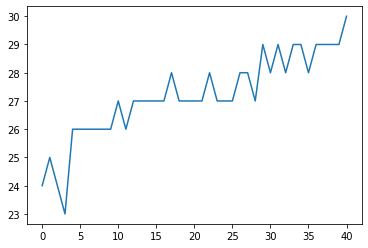

In [60]:
plt.plot([i for i in range(len(max_fitness_per_gen))], max_fitness_per_gen)